In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/IOT Application'
!ls

/content/drive/My Drive/IOT Application
'Classifier Weather.ipynb'	'Noi Bai.csv'
'Clone Weather.ipynb'		 timeseries_weather_forecasting
'Fetch API using Python.ipynb'	 Vinh.csv
 model_checkpoint_v2.h5		'Weather IoT'
 model_checkpoint_v2.json


In [5]:
df = pd.read_csv("Noi Bai.csv")
df

,Temperature,Humidity,Pressure,UV index,Conclusion
0,59.0,88.0,30.16,0,Fog
1,59.0,88.0,30.19,0,Fog
2,57.0,94.0,30.16,0,Fog
3,57.0,88.0,30.16,0,Fog
4,55.0,94.0,30.16,0,Fog
...,...,...,...,...,...
110301,91.0,63.0,29.61,5,Fair
110302,91.0,63.0,29.58,3,Partly Cloudy
110303,91.0,63.0,29.58,2,Partly Cloudy
110304,90.0,66.0,29.58,1,Mostly Cloudy


In [6]:
check_nan = df['Pressure'].isnull()
check_nan.value_counts()

False    110211
True         95
Name: Pressure, dtype: int64

In [7]:
df = df.drop(columns=['Conclusion'])

In [8]:
df

,Temperature,Humidity,Pressure,UV index
0,59.0,88.0,30.16,0
1,59.0,88.0,30.19,0
2,57.0,94.0,30.16,0
3,57.0,88.0,30.16,0
4,55.0,94.0,30.16,0
...,...,...,...,...
110301,91.0,63.0,29.61,5
110302,91.0,63.0,29.58,3
110303,91.0,63.0,29.58,2
110304,90.0,66.0,29.58,1


In [9]:
def mean(a):
  return sum(a)/len(a)

In [10]:
def fill_none(array_col):
    for i in range(len(array_col)):
      if math.isnan(array_col[i]):
        array_col[i] = mean([tmp for tmp in array_col[i-4:i+4] if math.isnan(tmp) == False])
    return array_col

In [11]:
df['Humidity']= fill_none(df['Humidity'].values)
df['Pressure'] = fill_none(df['Pressure'].values)
df['Temperature'] = fill_none(df['Temperature'].values)
df['UV index'] = fill_none(df['UV index'].values)

In [12]:
check_nan = df['UV index'].isnull()
check_nan.value_counts()

False    110306
Name: UV index, dtype: int64

In [13]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))
step = 8

past = 240
future = 24
learning_rate = 0.00001
# batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

We can see from the correlation heatmap, few parameters like Relative Humidity and
Specific Humidity are redundant. Hence we will be using select features, not all.

In [14]:
features = df
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

mean = train_data.mean(axis=0).values
std = train_data.std(axis=0).values
features =(features.values -mean) /std
features = pd.DataFrame(features)

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [15]:
train_data

,0,1,2,3
0,-1.722492,0.541658,1.496535,-0.646475
1,-1.722492,0.541658,1.635632,-0.646475
2,-1.919803,0.908782,1.496535,-0.646475
3,-1.919803,0.541658,1.496535,-0.646475
4,-2.117115,0.908782,1.496535,-0.646475
...,...,...,...,...
88239,-1.229213,0.235722,1.403803,0.748705
88240,-1.229213,0.235722,1.403803,0.748705
88241,-1.229213,0.235722,1.264706,0.399910
88242,-1.229213,-0.131402,1.264706,0.399910


# Training dataset

The training dataset labels starts from the 792nd observation (720 + 72).

In [16]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(4)]].values
y_train = features.iloc[start:end][[0]]

sequence_length = int(past / step)

In [17]:
y_train = y_train.values

In [18]:
y_train = y_train.tolist()
x_train = x_train.tolist()

In [19]:
print(y_train)

[[-0.3413113592412985], [-0.3413113592412985], [-0.3413113592412985], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.43996709351529256], [-0.6372785620632806], [-0.43996709351529256], [-0.6372785620632806], [-0.6372785620632806], [-0.6372785620632806], [-0.6372785620632806], [-0.6372785620632806], [-0.6372785620632806], [-0.6372785620632806], [-0.8345900306112687], [-0.8345900306112687], [-0.8345900306112687], [-1.0319014991592568], [-1.0319014991592568], [-1.229212967707245], [-1.229212967707245], [-1.229212967707245], [-1.229212967707245], [-1.229212967707245], [-1.229212967707245], [-1.0319014991592568], [-1.0319014991592568], [-1.0319014991592568], [-1.0319014991592568], [-1.229212967707245], [-1.0319014991592568], [-1.0319014991592568], [-1.0319014991592568], [-1.0319014991592568], [-1.0

The `timeseries_dataset_from_array` function takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as length of the
sequences/windows, spacing between two sequence/windows, etc., to produce batches of
sub-timeseries inputs and targets sampled from the main timeseries.

In [20]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step
)

## Validation dataset

The validation dataset must not contain the last 792 rows as we won't have label data for
those records, hence 792 must be subtracted from the end of the data.

The validation label dataset must start from 792 after train_split, hence we must add
past + future (792) to label_start.

In [21]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(4)]].values
y_val = features.iloc[label_start:][[0]]

x_val = x_val.tolist()
y_val = y_val.values.tolist()
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (128, 30, 4)
Target shape: (128, 1)


## Training

In [22]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 4)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4736      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


We'll use the `ModelCheckpoint` callback to regularly save checkpoints, and
the `EarlyStopping` callback to interrupt training when the validation loss
is not longer improving.

In [24]:
path_checkpoint = "model_checkpoint_step_8.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
688/688 [==============================] - 14s 20ms/step - loss: 0.2806 - val_loss: 0.2696

Epoch 00001: val_loss improved from inf to 0.26961, saving model to model_checkpoint_step_8.h5
Epoch 2/10
688/688 [==============================] - 14s 20ms/step - loss: 0.2754 - val_loss: 0.2654

Epoch 00002: val_loss improved from 0.26961 to 0.26536, saving model to model_checkpoint_step_8.h5
Epoch 3/10
688/688 [==============================] - 14s 20ms/step - loss: 0.2706 - val_loss: 0.2612

Epoch 00003: val_loss improved from 0.26536 to 0.26122, saving model to model_checkpoint_step_8.h5
Epoch 4/10
688/688 [==============================] - 14s 20ms/step - loss: 0.2660 - val_loss: 0.2572

Epoch 00004: val_loss improved from 0.26122 to 0.25716, saving model to model_checkpoint_step_8.h5
Epoch 5/10
688/688 [==============================] - 14s 20ms/step - loss: 0.2616 - val_loss: 0.2532

Epoch 00005: val_loss improved from 0.25716 to 0.25317, saving model to model_checkpoint_step

In [ ]:
model_json = model.to_json()
with open("model_checkpoint_v2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.load_weights("model_checkpoint_v2.h5")

We can visualize the loss with the function below. After one point, the loss stops
decreasing.

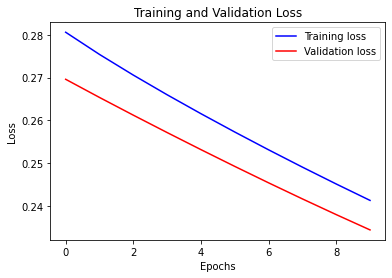

In [25]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

## Prediction

The trained model above is now able to make predictions for 5 sets of values from
validation set.

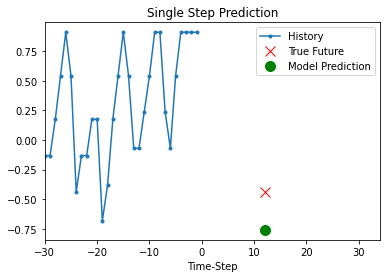

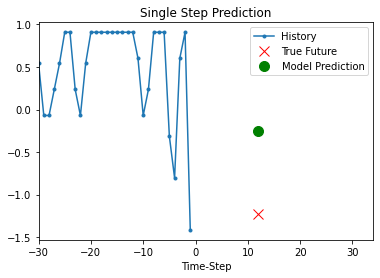

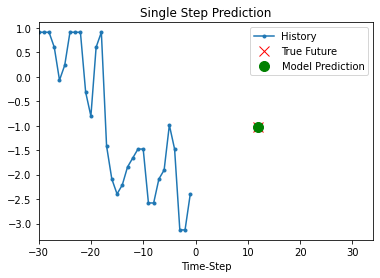

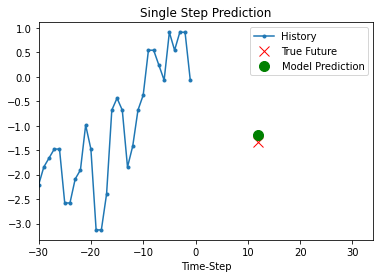

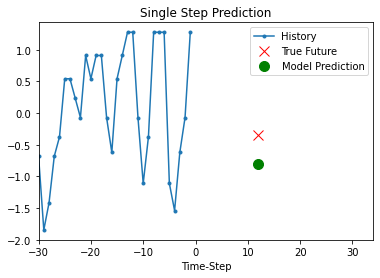

In [26]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [ ]:
for x, y in dataset_val.take(10):
  print(x.shape)
  print(y.shape)

(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
(128, 120, 4)
(128, 1)
